In [1]:
import torch

In [2]:
t1 = torch.tensor([i for i in range(1,10,2)])
t2 = torch.tensor([i for i in range(1,20,4)])

In [3]:
t1

tensor([1, 3, 5, 7, 9])

In [4]:
t2

tensor([ 1,  5,  9, 13, 17])

In [5]:
t1+t2

tensor([ 2,  8, 14, 20, 26])

In [6]:
t1*t2  # elementwise

tensor([  1,  15,  45,  91, 153])

In [7]:
t2 = torch.tensor([[1,2,5,6,8]])

In [8]:
t1.matmul(t2.T) # matrix multiplication

tensor([146])

In [9]:
t1-t2

tensor([[0, 1, 0, 1, 1]])

In [10]:
t1/t2

tensor([[1.0000, 1.5000, 1.0000, 1.1667, 1.1250]])

In [11]:
x = t1.numpy()

In [12]:
type(x)

numpy.ndarray

In [13]:
t1.add_(2*2)  # If tensor stored in CPU, inplace operations to a tensor will share common memory

tensor([ 5,  7,  9, 11, 13])

In [14]:
x

array([ 5,  7,  9, 11, 13], dtype=int64)

In [15]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

### GPU

In [16]:
torch.cuda.is_available() # checks if gpu available 

if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.ones(5, device=device)
    z = x **3
    z = z.to(device) # moves to gpu

    y = x+z # runs on gpu

    y.numpy() ## ERROR, numpy can only handle CPU tensors

### Gradient

In [17]:
# regression slope form
# y = mx + c

x = torch.tensor(3.0)

m = torch.tensor(1.0, requires_grad=True)
c = torch.tensor(5.0, requires_grad=True)

y = m*x + c

y.backward() # dy/dx = m + 1 
print(f'Grad of m : {m.grad}') # --> 3
print(f'Grad of c : {c.grad}') # --> 1

Grad of m : 3.0
Grad of c : 1.0


In [18]:
x = torch.randn(5, requires_grad=True)
print(x)

z = x.requires_grad_(False) ## setting the grad to tensor
print(z)

y = x.detach() ## new tensor detaching the grad functn
print(y)

tensor([ 0.1850,  0.2318,  0.2517,  2.4815, -0.9783], requires_grad=True)
tensor([ 0.1850,  0.2318,  0.2517,  2.4815, -0.9783])
tensor([ 0.1850,  0.2318,  0.2517,  2.4815, -0.9783])


In [19]:
x = torch.tensor([.1,2,5,7,9], requires_grad=True)
with torch.no_grad():
    y = x + 2.03*1.485
y

tensor([ 3.1145,  5.0146,  8.0146, 10.0146, 12.0146])

In [20]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):  # Training loop
    model_output = (weights*3).sum()

    model_output.backward()
    print(weights.grad)

    weights.grad.zero_() # setting the grad zero for every loop

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


### Back propagation

```x ---> a(x) ---->y b(y) ----> z```

**Chain Rule:**
Gradient -> dz/dx = dz/dy*dy/dx 

```Computational Graph```

**Notes**

* 3 steps process:
1. Forward pass: Compute loss
2. Compute local gradients
3. Backward pass: Compute ```d(Loss)/d(Weights)``` using chain rule



In [21]:
## Example 
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass & calc loss
y_hat = w*x
loss = (y_hat-y)**2

print(loss)

#backward pass
loss.backward()
print(w.grad)


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In general we can build any model by 4 ways:

* case: 1
    * Prediction: Manually
    * Gradients Computation: Manually
    * Loss Computation: Manually
    * Parameter updates: Manually 

* case: 2
    * Prediction: Manually
    * Gradients Computation: Autograd
    * Loss Computation: Manually
    * Parameter updates: Manually 

* case: 3
    * Prediction: Manually
    * Gradients Computation: Autograd
    * Loss Computation: PyTorch Loss
    * Parameter updates: PyTorch Optimizer

* case: 4
    * Prediction: PyTorch Model
    * Gradients Computation: Autograd
    * Loss Computation: PyTorch Loss
    * Parameter updates: PyTorch Optimizer
    

## Case: 1

In [22]:
# f = w*x
# f = 2*x

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE

def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

## Gradient 
## MSE          =    1/N *  (w*x - y)**2
## d(MSE)/dw    =    1/N 2x (w*x - y)

def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

# Training
n_iters = 20
learning_rate = 0.01

print(f'prediction before training: f(5) = {forward(5)}')

for epoch in range(n_iters):
    
    y_pred = forward(X) # forward pass
        
    l = loss(Y, y_pred) #loss
    
    dw = gradient(X,Y,y_pred) # gradients

    w -= learning_rate * dw  # update weights 

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}') 

print(f'prediction after training: f(5) = {forward(5)}')


prediction before training: f(5) = 0.0
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
prediction after training: f(5) = 9.99999977350235


## Case: 2

In [23]:
# f = w * x
# f = 2 * x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# Training
n_iters = 100
learning_rate = 0.01

print(f'prediction before training: f(5) = {forward(5)}')

for epoch in range(n_iters):
    
    y_pred = forward(X) # forward pass
        
    l = loss(Y, y_pred) #loss
    
    l.backward() # gradient = dl/dw

    with torch.no_grad():
        w -= learning_rate * w.grad  # update weights 

    w.grad.zero_() 

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}') 

print(f'prediction after training: f(5) = {forward(5):.3f}')


prediction before training: f(5) = 0.0
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
prediction after training: f(5) = 10.000


## Case: 3

In [24]:
## Training pipeline in pytorch
# 1. design model 
# 2. construct loss and optimizer
# 3. training loop
#      - forward pass: compute prediction
#      - backward pass: gradients
#      - update weights

# f = w * x
# f = 2 * x
import torch.nn as nn


X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x


n_iters = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w],lr=0.01)

print(f'prediction before training: f(5) = {forward(5)}')

# Training
for epoch in range(n_iters):
    
    y_pred = forward(X) # forward pass
        
    l = loss(Y, y_pred) #loss
    
    l.backward() # gradient = dl/dw

    optimizer.step()  # update weights 

    w.grad.zero_() 

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}') 

print(f'prediction after training: f(5) = {forward(5):.3f}')


prediction before training: f(5) = 0.0
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
prediction after training: f(5) = 10.000


## Case: 4

In [25]:
## Training pipeline in pytorch
# 1. design model 
# 2. construct loss and optimizer
# 3. training loop
#      - forward pass: compute prediction
#      - backward pass: gradients
#      - update weights

# f = w * x
# f = 2 * x
import torch.nn as nn


X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

n_iters = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
for epoch in range(n_iters):
    
    y_pred = model(X) # forward pass
        
    l = loss(Y, y_pred) #loss
    
    l.backward() # gradient = dl/dw

    optimizer.step()  # update weights 

    w.grad.zero_() 

    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}') 

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')


4 1
prediction before training: f(5) = -0.647
epoch 1: w = 0.275, loss = 35.70541763
epoch 11: w = 1.337, loss = 1.55933607
epoch 21: w = 0.780, loss = 3.91086841
epoch 31: w = 0.705, loss = 2.22391820
epoch 41: w = 1.077, loss = 1.30657768
epoch 51: w = 1.444, loss = 0.51164573
epoch 61: w = 1.639, loss = 0.17969069
epoch 71: w = 1.723, loss = 0.10028634
epoch 81: w = 1.780, loss = 0.06345269
epoch 91: w = 1.835, loss = 0.03662919
prediction after training: f(5) = 9.673


In [26]:
# creating a custom model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()

        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


model = LinearRegression(input_size, output_size)

#### Linear regression

In [27]:
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss = 1081.1012
epoch: 20, loss = 703.1006
epoch: 30, loss = 457.6850
epoch: 40, loss = 298.2519
epoch: 50, loss = 194.6111
epoch: 60, loss = 127.1948
epoch: 70, loss = 83.3125
epoch: 80, loss = 54.7292
epoch: 90, loss = 36.0980
epoch: 100, loss = 23.9451


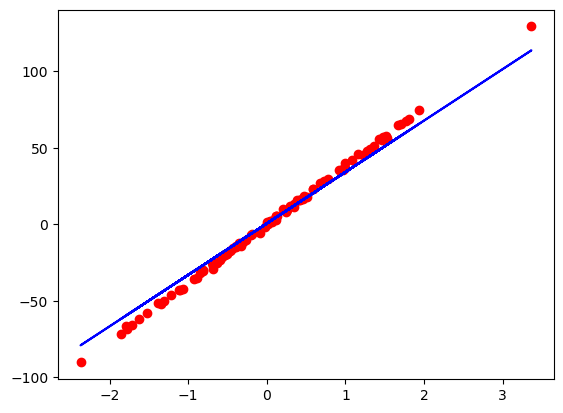

In [28]:
# prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 1, random_state=32 )

x = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

# 1. model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100
for num in range(num_epochs):
    # forward pass
    y_pred = model(x)
    
    # Loss
    loss = criterion(y, y_pred)
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (num+1) % 10 == 0:
        print(f'epoch: {num+1}, loss = {loss.item():.4f}')

# plot

predicted = model(x).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b' )
plt.show()

### Logistic regression

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare data

data = datasets.load_breast_cancer()

X, y = data.data, data.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1. model

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self,x):
        predicted = torch.sigmoid(self.linear(x))
        return predicted

model = LogisticRegression(n_features)

# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    #updates
    optimizer.step()
    #zero grad
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')




epoch: 10, loss = 0.7877
epoch: 20, loss = 0.5925
epoch: 30, loss = 0.4832
epoch: 40, loss = 0.4153
epoch: 50, loss = 0.3691
epoch: 60, loss = 0.3356
epoch: 70, loss = 0.3101
epoch: 80, loss = 0.2898
epoch: 90, loss = 0.2734
epoch: 100, loss = 0.2597
accuracy = 0.9123


## Dataset and Dataloader

In [30]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# Custom dataset 

class TitanicData(Dataset):
    def __init__(self, pre_process=None):
        super(TitanicData, self).__init__()
        data = pd.read_csv('./data/titanic.csv')
        if pre_process:
            self.features = PreProcess()

        #self.features = data.drop('Survived', axis=1).to_numpy()
        self.target = data[['Survived']].to_numpy()
        
        self.target_col = 'Survived'
        self.feature_cols = [col for col in data.columns if col != self.target_col]
        self.pre_process = pre_process

    def __len__(self): 
        return self.features[0]

    def __getitem__(self, index):
        sample = self.features[index], self.target[index]
        if self.pre_process:
            sample = self.pre_process(sample)

        return sample


class PreProcess:
    def __call__(self, df):
        return df.iloc[:,[0,1,5,6,7]]
        



In [31]:
my_data = TitanicData(pre_process=PreProcess())

#data_loader = DataLoader(dataset=my_data, batch_size=5, shuffle=True)

# total_samples = len(my_data)
# n_iterations = total_sample/batch_size
#for epoch in range(num_epochs):
#   for i, (inputs, labels) in enumerate(data_loader):



In [32]:
my_data.features

In [38]:
import torchvision

#dataset = torchvision.datasets.MNIST(root='MNIST/raw/train-images-idx3-ubyte' )

### Activation functions 
* Apply a non-linear transformation and decide whether a neuron should be activated or not.

1. Step function 
2. Sigmoid 
3. Tanh
4. RelU
5. Leaky ReLU -- modified version of relu to update the weights better
6. Softmax -- Good for multi class classification problems in last layers

In [49]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

    